In [11]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

In [12]:
dataset = pd.read_csv('../dataset/heart_2020_cleaned.csv')

dataset.replace( {'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1}, inplace=True)
dataset.replace( {'0-17': 0, '18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10, '70-74': 11, '75-79': 12, '80 or older': 13}, inplace=True)
dataset.drop(['Race', 'GenHealth','Stroke','DiffWalking','PhysicalHealth','Asthma','MentalHealth','Diabetic','KidneyDisease','SkinCancer'], axis=1,inplace=True)

feature_names = ['BMI','Smoking','AlcoholDrinking','Sex', 'AgeCategory','PhysicalActivity','SleepTime']
target_names = 'HeartDisease'

true_dataset  = []
false_dataset = []

df_positive = dataset[ dataset['HeartDisease'] == 1 ] 
df_negative = dataset[ dataset['HeartDisease'] == 0 ]
df_negative_cut = df_negative.sample(n = 30000)
dataset = pd.concat([df_positive, df_negative_cut])

target = dataset[target_names]
feature = dataset[feature_names]

print (target.value_counts())

0    30000
1    27373
Name: HeartDisease, dtype: int64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    feature,target,
    test_size=0.2,
    random_state=np.random.randint(10))

In [14]:
model = Sequential()

model.add(Dense(7, input_shape=(7,), activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
early_break = EarlyStopping(monitor='loss', patience=5)
reduce_learning_rate = ReduceLROnPlateau(patience=3)

result = model.fit(X_train, y_train, epochs = 40, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_break,reduce_learning_rate])

Epoch 1/40
4590/4590 [==============================] - 4s 861us/step - loss: 0.6391 - accuracy: 0.6816 - val_loss: 0.5858 - val_accuracy: 0.6883 - lr: 0.0010
Epoch 2/40
4590/4590 [==============================] - 4s 828us/step - loss: 0.5774 - accuracy: 0.6990 - val_loss: 0.5888 - val_accuracy: 0.6825 - lr: 0.0010
Epoch 3/40
4590/4590 [==============================] - 4s 849us/step - loss: 0.5713 - accuracy: 0.7052 - val_loss: 0.5747 - val_accuracy: 0.7020 - lr: 0.0010
Epoch 4/40
4590/4590 [==============================] - 4s 851us/step - loss: 0.5651 - accuracy: 0.7087 - val_loss: 0.5717 - val_accuracy: 0.7014 - lr: 0.0010
Epoch 5/40
4590/4590 [==============================] - 4s 851us/step - loss: 0.5606 - accuracy: 0.7113 - val_loss: 0.5665 - val_accuracy: 0.7094 - lr: 0.0010
Epoch 6/40
4590/4590 [==============================] - 4s 933us/step - loss: 0.5578 - accuracy: 0.7131 - val_loss: 0.5717 - val_accuracy: 0.6990 - lr: 0.0010
Epoch 7/40
4590/4590 [========================

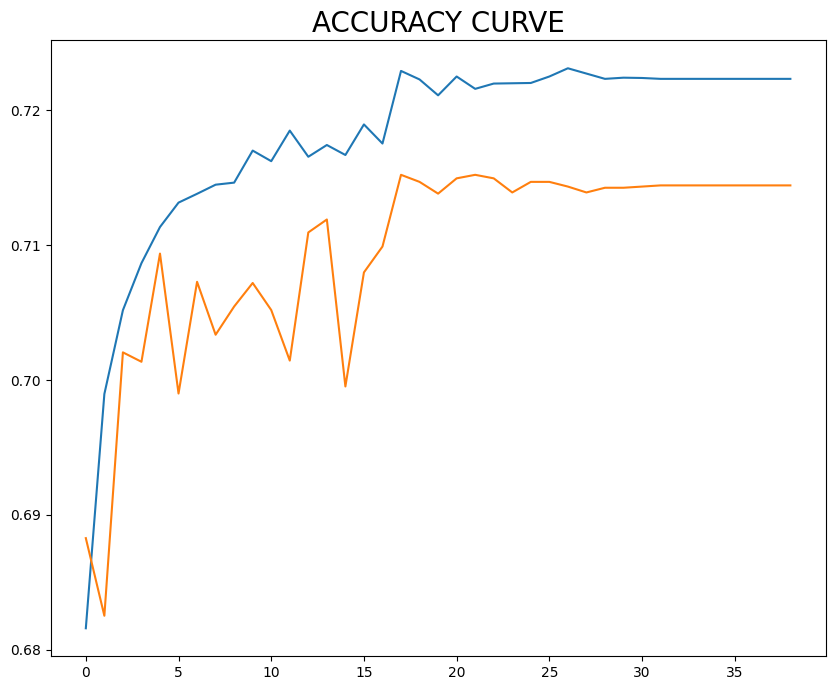

In [16]:
plt.figure(figsize=(10,8))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

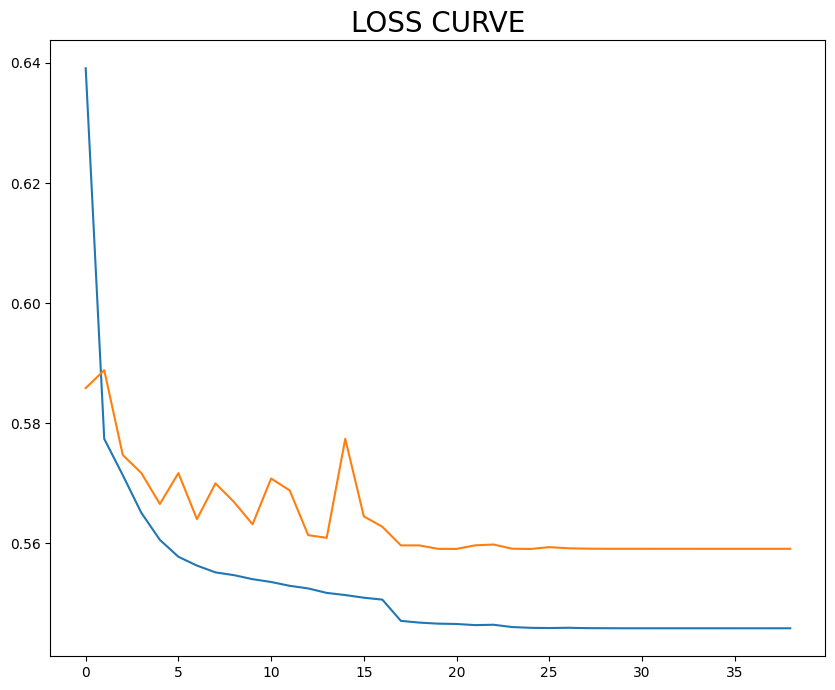

In [17]:
plt.figure(figsize=(10,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('LOSS CURVE',fontdict={'size':20})
plt.show()

In [18]:
model.evaluate(X_test, y_test)

359/359 [==============================] - 0s 632us/step - loss: 0.5591 - accuracy: 0.7144


[0.5590817928314209, 0.7144226431846619]

In [19]:
model.save('./model',overwrite=True)

INFO:tensorflow:Assets written to: ./model\assets
